### Numpy
Numpy是Python中用于科学计算的核心库。它提供了高性能的多维数组对象，以及相关工具。

数组Arrays
一个numpy数组是一个由不同数值组成的网格。网格中的数据都是同一种数据类型，可以通过非负整型数的元组来访问。维度的数量被称为数组的阶，数组的大小是一个由整型数构成的元组，可以描述数组不同维度上的大小。

我们可以从列表创建数组，然后利用方括号访问其中的元素：

In [2]:
import numpy as np

a = np.array([1, 2, 3])  # Create a rank 1 array
print(type(a))           # Prints "<type 'numpy.ndarray'>"
print(a.shape)           # Prints "(3,)"
print(a[0], a[1], a[2])  # Prints "1 2 3"
a[0] = 5                 # Change an element of the array
print(a)                 # Prints "[5, 2, 3]"

b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print(b)                          # 显示一下矩阵b
print(b.shape)                    # Prints "(2, 3)"
print(b[0, 0], b[0, 1], b[1, 0])  # Prints "1 2 4"

<class 'numpy.ndarray'>
(3,)
1 2 3
[5 2 3]
[[1 2 3]
 [4 5 6]]
(2, 3)
1 2 4


Numpy还提供了很多其他创建数组的方法：

In [3]:
import numpy as np

a = np.zeros((2,2))  # Create an array of all zeros
print(a)             # Prints "[[ 0.  0.]
                     #          [ 0.  0.]]"

b = np.ones((1,2))   # Create an array of all ones
print(b)             # Prints "[[ 1.  1.]]"

c = np.full((2,2), 7) # Create a constant array
print(c)              # Prints "[[ 7.  7.]
                      #          [ 7.  7.]]"

d = np.eye(2)        # Create a 2x2 identity matrix
print(d)             # Prints "[[ 1.  0.]
                     #          [ 0.  1.]]"

e = np.random.random((2,2)) # Create an array filled with random values
print(e)                    # Might print "[[ 0.91940167  0.08143941]
                            #               [ 0.68744134  0.87236687]]"

[[0. 0.]
 [0. 0.]]
[[1. 1.]]
[[7 7]
 [7 7]]
[[1. 0.]
 [0. 1.]]
[[0.95448821 0.91617427]
 [0.18224263 0.59882081]]


其他数组相关方法，请查看文档。

### 访问数组
Numpy提供了多种访问数组的方法。

**切片**：和Python列表类似，numpy数组可以使用切片语法。因为数组可以是多维的，所以你必须为每个维度指定好切片。

In [5]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]

# A slice of an array is a view into the same data, so modifying it
# will modify the original array.
print(a[0, 1])  # Prints "2"
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])  # Prints "77"

2
77


你可以同时使用整型和切片语法来访问数组。但是，这样做会产生一个比原数组低阶的新数组。需要注意的是，这里和MATLAB中的情况是不同的：

In [6]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Two ways of accessing the data in the middle row of the array.
# Mixing integer indexing with slices yields an array of lower rank,
# while using only slices yields an array of the same rank as the
# original array:
row_r1 = a[1, :]    # Rank 1 view of the second row of a  
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape) # Prints "[5 6 7 8] (4,)"
print(row_r2, row_r2.shape) # Prints "[[5 6 7 8]] (1, 4)"

# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape) # Prints "[ 2  6 10] (3,)"
print(col_r2, col_r2.shape) # Prints "[[ 2]
                            #          [ 6]
                            #          [10]] (3, 1)"

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[ 2  6 10] (3,)
[[ 2]
 [ 6]
 [10]] (3, 1)


整型数组访问：当我们使用切片语法访问数组时，得到的总是原数组的一个子集。整型数组访问允许我们利用其它数组的数据构建一个新的数组：

In [7]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and 
print(a[[0, 1, 2], [0, 1, 0]]) # Prints "[1 4 5]"

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]])) # Prints "[1 4 5]"

# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]]) # Prints "[2 2]"

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]])) # Prints "[2 2]"

[1 4 5]
[1 4 5]
[2 2]
[2 2]


整型数组访问语法还有个有用的技巧，可以用来选择或者更改矩阵中每行中的一个元素：

In [8]:
import numpy as np

# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])

print(a) # prints "array([[ 1,  2,  3],
         #                [ 4,  5,  6],
         #                [ 7,  8,  9],
         #                [10, 11, 12]])"

# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b]) # Prints "[ 1  6  7 11]"

# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10

print(a) # prints "array([[11,  2,  3],
         #                [ 4,  5, 16],
         #                [17,  8,  9],
         #                [10, 21, 12]])

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[ 1  6  7 11]
[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


布尔型数组访问：布尔型数组访问可以让你选择数组中任意元素。通常，这种访问方式用于选取数组中满足某些条件的元素，举例如下：

In [9]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print(bool_idx)     # Prints "[[False False]
                    #          [ True  True]
                    #          [ True  True]]"

# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx]) # Prints "[3 4 5 6]"

# We can do all of the above in a single concise statement:
print(a[a > 2])    # Prints "[3 4 5 6]"

[[False False]
 [ True  True]
 [ True  True]]
[3 4 5 6]
[3 4 5 6]


#### 数据类型
每个Numpy数组都是数据类型相同的元素组成的网格。Numpy提供了很多的数据类型用于创建数组。当你创建数组的时候，Numpy会尝试猜测数组的数据类型，你也可以通过参数直接指定数据类型，例子如下：

In [10]:
import numpy as np

x = np.array([1, 2])  # Let numpy choose the datatype
print(x.dtype)        # Prints "int64"

x = np.array([1.0, 2.0])  # Let numpy choose the datatype
print(x.dtype)            # Prints "float64"

x = np.array([1, 2], dtype=np.int64)  # Force a particular datatype
print(x.dtype)                        # Prints "int64"

int64
float64
int64


#### 数组计算
基本数学计算函数会对数组中元素逐个进行计算，既可以利用操作符重载，也可以使用函数方式：

In [11]:
import numpy as np

x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
# [[ 6.0  8.0]
#  [10.0 12.0]]
print(x + y)
print(np.add(x, y))

# Elementwise difference; both produce the array
# [[-4.0 -4.0]
#  [-4.0 -4.0]]
print(x - y)
print(np.subtract(x, y))

# Elementwise product; both produce the array
# [[ 5.0 12.0]
#  [21.0 32.0]]
print(x * y)
print(np.multiply(x, y))

# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]
[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]
[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[1.         1.41421356]
 [1.73205081 2.        ]]


和MATLAB不同，*是元素逐个相乘，而不是矩阵乘法。在Numpy中使用dot来进行矩阵乘法：

In [12]:
import numpy as np

x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))

# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))

219
219
[29 67]
[29 67]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy提供了很多计算数组的函数，其中最常用的一个是sum：

In [13]:
import numpy as np

x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


除了计算，我们还常常改变数组或者操作其中的元素。其中将矩阵转置是常用的一个，在Numpy中，使用T来转置矩阵：

In [14]:
import numpy as np

x = np.array([[1,2], [3,4]])
print(x)   # Prints "[[1 2]
           #          [3 4]]"
print(x.T) # Prints "[[1 3]
           #          [2 4]]"

# Note that taking the transpose of a rank 1 array does nothing:
v = np.array([1,2,3])
print(v)   # Prints "[1 2 3]"
print(v.T) # Prints "[1 2 3]"

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]
[1 2 3]
[1 2 3]


#### 广播Broadcasting
广播是一种强有力的机制，它让Numpy可以让不同大小的矩阵在一起进行数学计算。我们常常会有一个小的矩阵和一个大的矩阵，然后我们会需要用小的矩阵对大的矩阵做一些计算。

举个例子，如果我们想要把一个向量加到矩阵的每一行，我们可以这样做：

In [15]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

# Now y is the following
# [[ 2  2  4]
#  [ 5  5  7]
#  [ 8  8 10]
#  [11 11 13]]
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


这样是行得通的，但是当x矩阵非常大，利用循环来计算就会变得很慢很慢。我们可以换一种思路：

In [16]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
vv = np.tile(v, (4, 1))  # Stack 4 copies of v on top of each other
print(vv)                # Prints "[[1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]]"
y = x + vv  # Add x and vv elementwise
print(y) # Prints "[[ 2  2  4
         #          [ 5  5  7]
         #          [ 8  8 10]
         #          [11 11 13]]"

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy广播机制可以让我们不用创建vv，就能直接运算，看看下面例子：

In [17]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y) # Prints "[[ 2  2  4]
         #          [ 5  5  7]
         #          [ 8  8 10]
         #          [11 11 13]]"

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


对两个数组使用广播机制要遵守下列规则：

>如果数组的秩不同，使用1来将秩较小的数组进行扩展，直到两个数组的尺寸的长度都一样。<br>
如果两个数组在某个维度上的长度是一样的，或者其中一个数组在该维度上长度为1，那么我们就说这两个数组在该维度上是相容的。<br>
如果两个数组在所有维度上都是相容的，他们就能使用广播。<br>
如果两个输入数组的尺寸不同，那么注意其中较大的那个尺寸。因为广播之后，两个数组的尺寸将和那个较大的尺寸一样。<br>
在任何一个维度上，如果一个数组的长度为1，另一个数组长度大于1，那么在该维度上，就好像是对第一个数组进行了复制。<br>
如果上述解释看不明白，可以读一读文档和这个解释。译者注：强烈推荐阅读文档中的例子。<br>

下面是一些广播机制的使用：

In [18]:
import numpy as np

# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:
# [[ 4  5]
#  [ 8 10]
#  [12 15]]
print(np.reshape(v, (3, 1)) * w)

# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:
# [[2 4 6]
#  [5 7 9]]
print(x + v)

# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:
# [[ 5  6  7]
#  [ 9 10 11]]
print((x.T + w).T)

# Another solution is to reshape w to be a row vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print(x + np.reshape(w, (2, 1)))

# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
# [[ 2  4  6]
#  [ 8 10 12]]
print(x * 2)

[[ 4  5]
 [ 8 10]
 [12 15]]
[[2 4 6]
 [5 7 9]]
[[ 5  6  7]
 [ 9 10 11]]
[[ 5  6  7]
 [ 9 10 11]]
[[ 2  4  6]
 [ 8 10 12]]


广播机制能够让你的代码更简洁更迅速，能够用的时候请尽量使用！

#### Numpy文档
这篇教程涉及了你需要了解的numpy中的一些重要内容，但是numpy远不止如此。可以查阅numpy文献来学习更多。

#### SciPy
Numpy提供了高性能的多维数组，以及计算和操作数组的基本工具。SciPy基于Numpy，提供了大量的计算和操作数组的函数，这些函数对于不同类型的科学和工程计算非常有用。

熟悉SciPy的最好方法就是阅读文档。我们会强调对于本课程有用的部分。

#### 图像操作
SciPy提供了一些操作图像的基本函数。比如，它提供了将图像从硬盘读入到数组的函数，也提供了将数组中数据写入的硬盘成为图像的函数。下面是一个简单的例子：

/opt/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


uint8 (168, 224, 3)


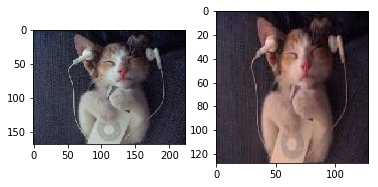

In [22]:
import imageio
from skimage import transform
import matplotlib.pyplot as plt

# Read an JPEG image into a numpy array
img = imageio.imread('images/cat.jpeg')
print(img.dtype, img.shape) # Prints "uint8 (400, 248, 3)"

# We can tint the image by scaling each of the color channels
# by a different scalar constant. The image has shape (400, 248, 3);
# we multiply it by the array [1, 0.95, 0.9] of shape (3,);
# numpy broadcasting means that this leaves the red channel unchanged,
# and multiplies the green and blue channels by 0.95 and 0.9
# respectively.
img_tinted = img * [1.2, 0.95, 0.9]

# Resize the tinted image to be 300 by 300 pixels.
img_tinted = transform.resize(img_tinted, (128, 128))

# Write the tinted image back to disk
imageio.imwrite('images/cat_tinted.jpeg', img_tinted)

f, (ax1, ax2) = plt.subplots(1, 2)
img2 = imageio.imread('images/cat_tinted.jpeg')
ax1.imshow(img)
ax2.imshow(img2)

—————————————————————————————————————————


左边是原始图片，右边是变色和变形的图片。

—————————————————————————————————————————
#### 点之间的距离
SciPy定义了一些有用的函数，可以计算集合中点之间的距离。

函数scipy.spatial.distance.pdist能够计算集合中所有两点之间的距离：

In [23]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

# Create the following array where each row is a point in 2D space:
# [[0 1]
#  [1 0]
#  [2 0]]
x = np.array([[0, 1], [1, 0], [2, 0]])
print(x)

# Compute the Euclidean distance between all rows of x.
# d[i, j] is the Euclidean distance between x[i, :] and x[j, :],
# and d is the following array:
# [[ 0.          1.41421356  2.23606798]
#  [ 1.41421356  0.          1.        ]
#  [ 2.23606798  1.          0.        ]]
d = squareform(pdist(x, 'euclidean'))
print(d)

[[0 1]
 [1 0]
 [2 0]]
[[0.         1.41421356 2.23606798]
 [1.41421356 0.         1.        ]
 [2.23606798 1.         0.        ]]


#### Matplotlib
Matplotlib是一个作图库。这里简要介绍matplotlib.pyplot模块，功能和MATLAB的作图功能类似。

#### 绘图
matplotlib库中最重要的函数是Plot。该函数允许你做出2D图形，如下：

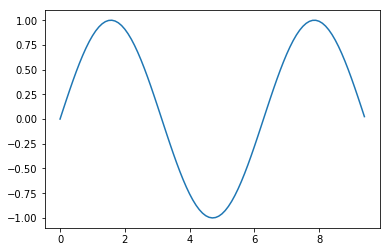

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)
plt.show()  # You must call plt.show() to make graphics appear.

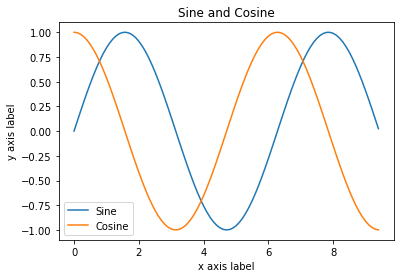

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
plt.show()

#### 绘制多个图像
可以使用subplot函数来在一幅图中画不同的东西：

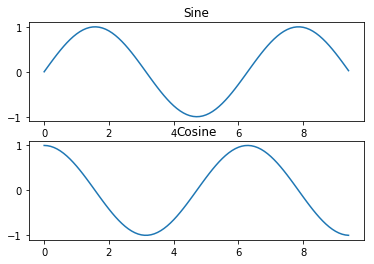

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

#### 图像
你可以使用imshow函数来显示图像，如下所示：

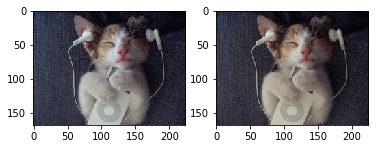

In [31]:
import numpy as np
from skimage import transform
import imageio
import matplotlib.pyplot as plt

img = imageio.imread('images/cat.jpeg')
img_tinted = img * [1, 0.95, 0.9]

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(img)

# Show the tinted image
plt.subplot(1, 2, 2)

# A slight gotcha with imshow is that it might give strange results
# if presented with data that is not uint8. To work around this, we
# explicitly cast the image to uint8 before displaying it.
plt.imshow(np.uint8(img_tinted))
plt.show()